## Fashion sales project

This project aims to gain insights into the fashion market and optimize the selling process by leveraging on the available fashion sales data and using different machine-learning solutions.

#### Workflow of the project
- Data Collection
- Data Checks to perform
- Exploratory data analysis
- Data Pre-Processing
- Model Training
- Choose best model

In [1]:
# We define all the packages needed to carry out the project
# --- Data visualization and data analysis ---
import matplotlib.pyplot as plt
#from mlxtend.plotting import plot_decision_regions
import seaborn as sns
import numpy as np
from scipy.stats import uniform
import pandas as pd
#import prince
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn import model_selection
from sklearn import preprocessing
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE

# --- Machine learning models ---
from sklearn.ensemble import RandomForestClassifier
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression
from mlxtend.classifier import StackingCVClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV

%matplotlib inline

# Used to ignore warnings generated from StackingCVClassifier
import warnings
warnings.simplefilter('ignore')

In [2]:
# Load the dataset
df = pd.read_csv('data/mock_fashion_data_uk_us.csv')

#### 4) Data Pre-processing
- Separate data in predictors (indipendent variables) and responses or targets (dependent variables)
- Apply the corresponding transformation on each variable
- Check correlation between predictors
- Split data in training and validation dataset

In [3]:
# Predictors
X = df.drop(columns=['Product Name', 'Price'], axis=1)

# We will use as a response variable the price of the clothes
y = df['Price']

In [4]:
# Check if it was done correctly
X.head()

,Brand,Category,Description,Rating,Review Count,Style Attributes,Total Sizes,Available Sizes,Color,Purchase History,Age,Fashion Magazines,Fashion Influencers,Season,Time Period Highest Purchase,Customer Reviews,Social Media Comments,feedback
0,Ralph Lauren,Footwear,Bad,1.421706,492,Streetwear,"M, L, XL",XL,Green,Medium,24,Vogue,Chiara Ferragni,Fall/Winter,Daytime,Mixed,Mixed,Other
1,Ted Baker,Tops,Not Good,1.037677,57,Vintage,"M, L, XL",XL,Black,Above Average,61,Glamour,Leandra Medine,Winter,Weekend,Negative,Neutral,Other
2,Jigsaw,Footwear,Very Bad,3.967106,197,Streetwear,"S, M, L",M,Blue,Average,27,Marie Claire,Gigi Hadid,Summer,Nighttime,Unknown,Negative,Neutral
3,Alexander McQueen,Outerwear,Not Good,2.844659,473,Formal,"S, M, L",L,Red,Very High,50,Marie Claire,Chiara Ferragni,Fall/Winter,Weekend,Neutral,Other,Other
4,Tommy Hilfiger,Bottoms,Very Good,1.183242,55,Sporty,"M, L, XL",S,Green,Above Average,23,Glamour,Song of Style,Spring,Daytime,Positive,Mixed,Positive


In [5]:
# Separete between numerical and categorical features
num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

# Instantiate transformers
numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

# Create a Column Transformer with 2 types of transformers
preprocessor = ColumnTransformer([("OneHotEncoder", oh_transformer, cat_features),
                                  ("StandardScaler", numeric_transformer, num_features),])

In [6]:
# Apply transformations on predictors
X = preprocessor.fit_transform(X)

In [ ]:
# Convert transformed predictors into pandas DataFrame
testing_X = pd.DataFrame(X.toarray())

In [17]:
# Compute the correlation matrix
correlation_matrix = testing_X.corr()

In [30]:
# List of correlation values
correlation_values = []

# Getting the correlation values from the lower triangle of the correlation matrix
for i in range(correlation_matrix.shape[0]):
    for j in range(i+1):
        correlation_values.append(correlation_matrix.to_numpy()[i,j])
        
# Convertion to numpy array
correlation_values = np.array(correlation_values)

<AxesSubplot: ylabel='Count'>

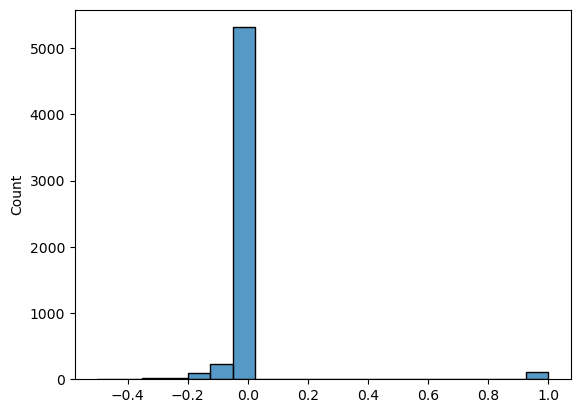

In [35]:
# Histogram to see the distribution of correlation values given the huge number of them
sns.histplot(correlation_values, bins=20)

In [7]:
# Separate dataset into training and validation data
X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_validation.shape

((800000, 107), (200000, 107))

#### 5) Model Training
- Choose the models to be used

In [ ]:
# Dictionary of models
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(),
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}

In [36]:
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')

scipy.sparse._csr.csr_matrix

In [ ]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square